## Conclusion

## Exercises

### Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last column is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use `pandas` to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what standardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [178]:
df_dia = pd.read_csv('../data/diabetes.csv')
df_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
df_dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


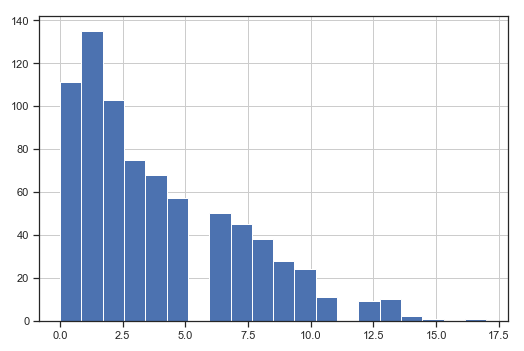

In [180]:
df_dia['Pregnancies'].hist(bins=20)

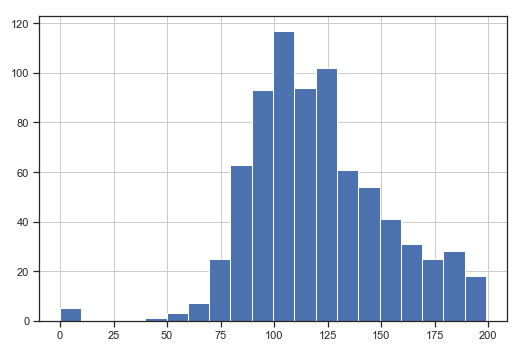

In [181]:
df_dia['Glucose'].hist(bins=20)

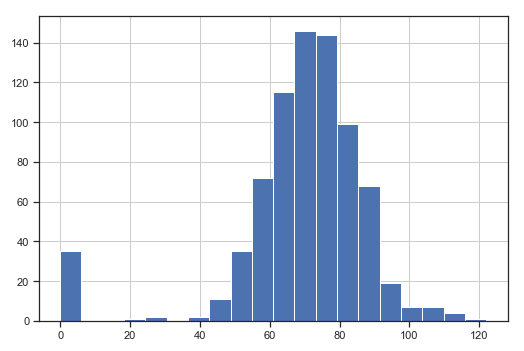

In [182]:
df_dia['BloodPressure'].hist(bins=20)

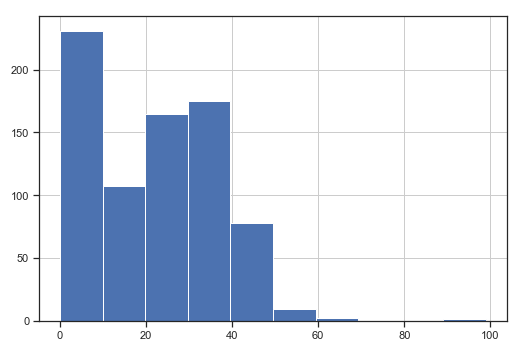

In [183]:
df_dia['SkinThickness'].hist(bins=10)

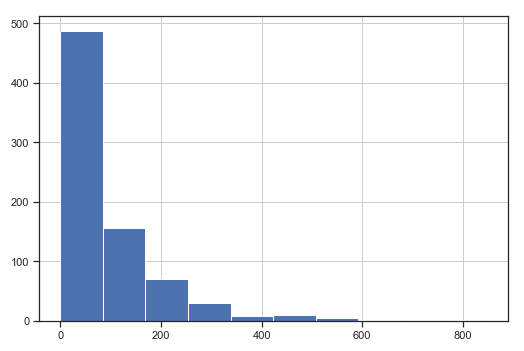

In [184]:
df_dia['Insulin'].hist(bins=10)

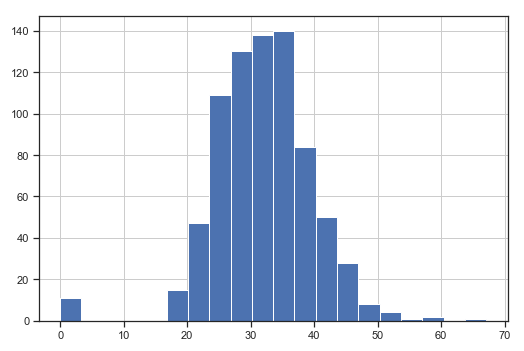

In [185]:
df_dia['BMI'].hist(bins=20)

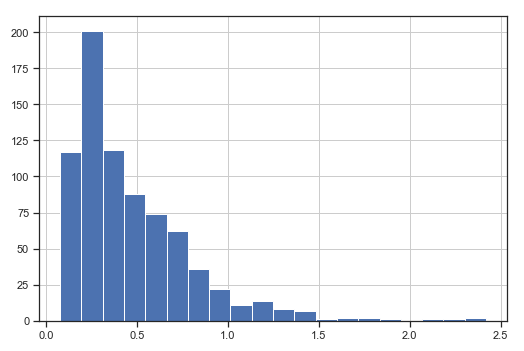

In [186]:
#DiabetesPedigreeFunction 	Age 	
df_dia['DiabetesPedigreeFunction'].hist(bins=20)

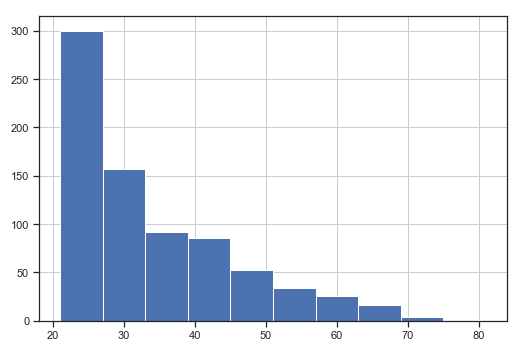

In [187]:
df_dia['Age'].hist(bins=10)


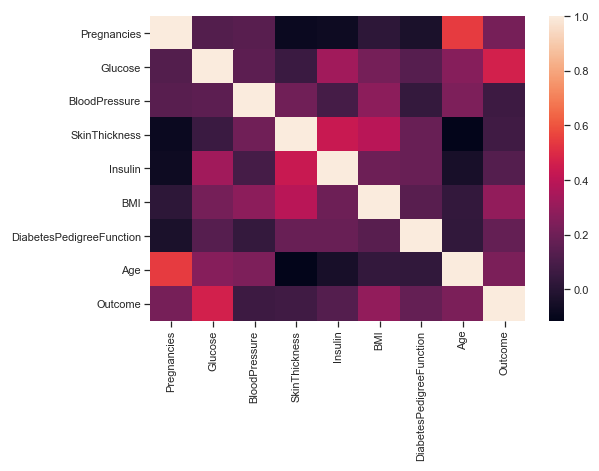

In [188]:
#Explore correlations of features with the outcome column. 
#You can do this in several ways, for example using the sns.pairplot 
#we used above or drawing a heatmap of the correlations.
import seaborn as sns
corr = df_dia.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

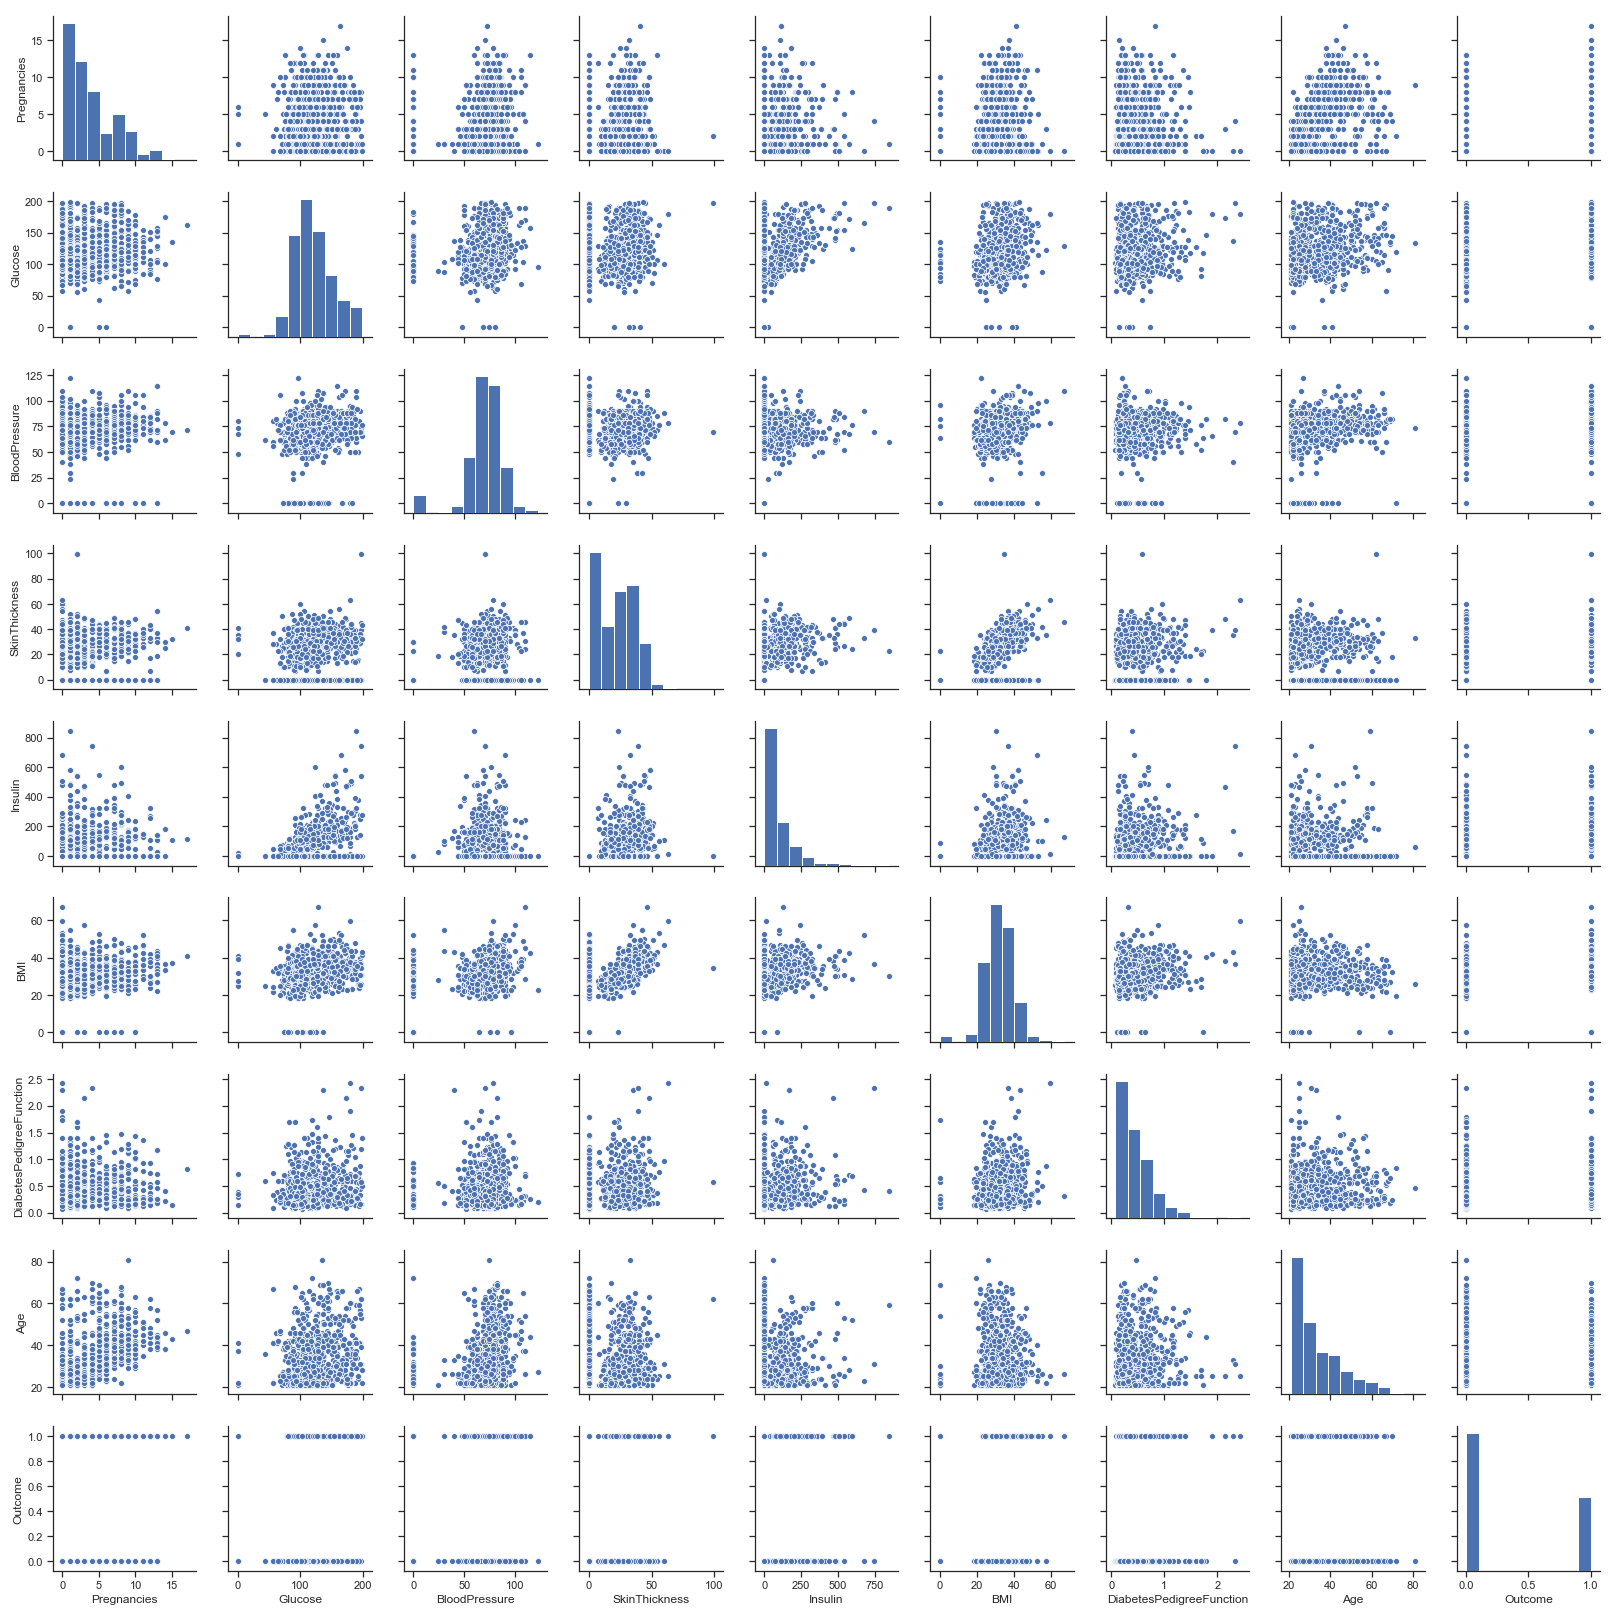

In [189]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_dia)

In [190]:
#Do features need standardization?
#If so what standardization technique will you use? MinMax? Standard?
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_dia['Pregnancies_ss'] = ss.fit_transform(df_dia[['Pregnancies']])
df_dia['Glucose_ss'] = ss.fit_transform(df_dia[['Glucose']])
df_dia['BloodPressure_ss'] = ss.fit_transform(df_dia[['BloodPressure']])
df_dia['SkinThickness_ss'] = ss.fit_transform(df_dia[['SkinThickness']])
df_dia['Insulin_ss'] = ss.fit_transform(df_dia[['Insulin']])
df_dia['BMI_ss'] = ss.fit_transform(df_dia[['BMI']])
df_dia['DiabetesPedigreeFunction_ss'] = ss.fit_transform(df_dia[['DiabetesPedigreeFunction']])
df_dia['Age_ss'] = ss.fit_transform(df_dia[['Age']])
df_dia.describe().round(2)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,...,SkinThickness_ss,Insulin_ss,BMI_ss,DiabetesPedigreeFunction_ss,Age_ss
count,768.00,768.00,768.00,768.00,768.00,...,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,...,0.00,-0.00,0.00,0.00,0.00
std,3.37,31.97,19.36,15.95,115.24,...,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,0.00,0.00,...,-1.29,-0.69,-4.06,-1.19,-1.04
25%,1.00,99.00,62.00,0.00,0.00,...,-1.29,-0.69,-0.60,-0.69,-0.79
50%,3.00,117.00,72.00,23.00,30.50,...,0.15,-0.43,0.00,-0.30,-0.36
75%,6.00,140.25,80.00,32.00,127.25,...,0.72,0.41,0.58,0.47,0.66
max,17.00,199.00,122.00,99.00,846.00,...,4.92,6.65,4.46,5.88,4.06


In [232]:
#Prepare your final X and y variables to be used by a ML model. 
#Make sure you define your target variable well. Will you need dummy columns?
df_final = df_dia[['Pregnancies_ss','Glucose_ss','BloodPressure_ss',
                  'SkinThickness_ss','Insulin_ss','BMI_ss',
                  'DiabetesPedigreeFunction_ss','Age_ss']]
df_final.head()
df_feat = df_dia[['Outcome']]
df_feat.head()
X_di = df_final
y_di = df_feat

### Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [234]:
from sklearn.model_selection import train_test_split
X_train_di,X_test_di,y_train_di,y_test_di = train_test_split(X_di,y_di,random_state = 22,test_size=0.2)

In [235]:
model_dia = Sequential()

model_dia.add(Dense(1, input_dim=8, activation='relu'))
model_dia.add(Dense(1, activation='sigmoid'))
model_dia.compile(Adam(lr=0.05),
              'binary_crossentropy',
              metrics=['accuracy'])
# model_real.add(Dense(1,input_dim=3,activation='relu'))
# model_real.summary()

In [292]:
model_dia.fit(X_train_di,y_train_di,validation_split=0.1,epochs=100, verbose=0)
y_pred_train = model_dia.predict_classes(X_train_di)
y_pred_test = model_dia.predict_classes(X_test_di)

In [293]:
acc_train = accuracy_score(y_train_di, y_pred_train)
print("Accuracy (Train set):\t{:0.3f}".format(acc_train))

acc_test = accuracy_score(y_test_di, y_pred_test)
print("Accuracy (Test set):\t{:0.3f}".format(acc_test))

Accuracy (Train set):	0.793
Accuracy (Test set):	0.760


In [274]:
from sklearn.metrics import classification_report
y_pred_te = model_dia.predict_classes(X_test_di)
y_pred_tr = model_dia.predict_classes(X_train_di)

y_test_class_di = np.argmax(y_test_di, axis=1)
y_pred_class_di = np.argmax(y_pred_te, axis=1)

print(classification_report(y_test_class_di, y_pred_class_di))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154

   micro avg       1.00      1.00      1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [283]:
#cm_di = confusion_matrix(y_test_class_di, y_pred_class_di)
#print('   ',cm_di)

# pd.DataFrame(cm_di, index = targets,
#              columns = ['pred_'+c for c in targets])
confusion_matrix(y_test_di,y_pred_te)

array([[88, 12],
       [26, 28]])

### Exercise 3

Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [317]:
from sklearn.ensemble import RandomForestClassifier
clf_di = RandomForestClassifier(n_estimators=300, 
                             max_depth=2,random_state=0).fit(X_train_di,y_train_di)


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [318]:
rend_test_pred = clf_di.predict(X_test_di)
rend_train_pred = clf_di.predict(X_train_di)

acc_train_rf = accuracy_score(y_train_di, rend_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc_train_rf))

acc_test_rf = accuracy_score(y_test_di, rend_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc_test_rf))


Accuracy (Train set):	0.772
Accuracy (Test set):	0.721


In [322]:
df_final2 = df_dia[['Glucose_ss','Insulin_ss','BMI_ss','Age_ss']]
df_final2.head()
df_feat2 = df_dia[['Outcome']]
df_feat2.head()
X_di2 = df_final2
y_di2 = df_feat2

In [324]:
from sklearn.model_selection import train_test_split
X_train_di,X_test_di,y_train_di,y_test_di = train_test_split(X_di2,y_di2,random_state = 22,test_size=0.2)

In [328]:
clf_di = RandomForestClassifier(n_estimators=400, 
                             max_depth=2,random_state=0).fit(X_train_di,y_train_di)
rend_test_pred = clf_di.predict(X_test_di)
rend_train_pred = clf_di.predict(X_train_di)

acc_train_rf = accuracy_score(y_train_di, rend_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc_train_rf))

acc_test_rf = accuracy_score(y_test_di, rend_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc_test_rf))


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy (Train set):	0.790
Accuracy (Test set):	0.734


### Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based Neural Network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need to understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.